## Problem Statement

The problem statement for COVID-19 data analysis in India involves understanding and gaining insights from the available data related to the COVID-19 pandemic in the country. This data includes information about the number of cases, deaths, recoveries, testing, and other relevant factors associated with the spread and impact of the virus. The objective is to analyze this data to identify trends, patterns, and correlations, which can help in making informed decisions, formulating effective strategies, and developing targeted interventions to combat the pandemic.

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import datetime

In [143]:
covid = pd.read_csv("D:\covid19 dataset\covid_19_india.csv")
vaccine = pd.read_csv("D:\covid19 dataset\covid_vaccine_statewise.csv")

In [144]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [145]:
covid.shape

(18110, 9)

In [146]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


### checking for missing value

In [147]:
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [148]:
covid.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [149]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


### Active cases

In [150]:
covid['Active'] = covid['Confirmed'] - covid['Cured'] + covid['Deaths']

In [151]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [152]:
covid['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Tamil Nadu                                  523
Ladakh                                      523
Punjab                                      521
Jammu and Kashmir                           521
Karnataka                                   520
Maharashtra                                 520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [153]:
covid['State/UnionTerritory']= covid['State/UnionTerritory'].replace('Maharashtra***',"Maharashtra")
covid['State/UnionTerritory']= covid['State/UnionTerritory'].replace('Bihar****',"Bihar")
covid['State/UnionTerritory']= covid['State/UnionTerritory'].replace('Madhya Pradesh***',"Madhya Pradesh")
covid['State/UnionTerritory']= covid['State/UnionTerritory'].replace('Karanataka',"Karnataka")

In [154]:
covid['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Karnataka                                   521
Jammu and Kashmir                           521
Maharashtra                                 521
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
West Bengal                                 512
Puducherry                                  512
Chandigarh                                  511
Chhattisgarh                                511
Gujarat                                     510
Madhya Pradesh                              509
Bihar                                   

In [155]:
#pivot table
statewise_data=pd.pivot_table(covid, values=['Confirmed','Deaths','Cured'],index="State/UnionTerritory", aggfunc=max)

In [156]:
statewise_data.head()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646


### Recovery rate

In [157]:
statewise_data['Recovery rate'] = statewise_data['Cured']*100/statewise_data['Confirmed']

### Mortality rate

In [158]:
statewise_data['Mortality rate'] = statewise_data['Deaths']*100/statewise_data['Confirmed']

### top 10 active cases states

In [159]:
top10Active =covid.groupby(by='State/UnionTerritory').max()[['Active','Date']].sort_values(by=['Active'],ascending=False).reset_index()

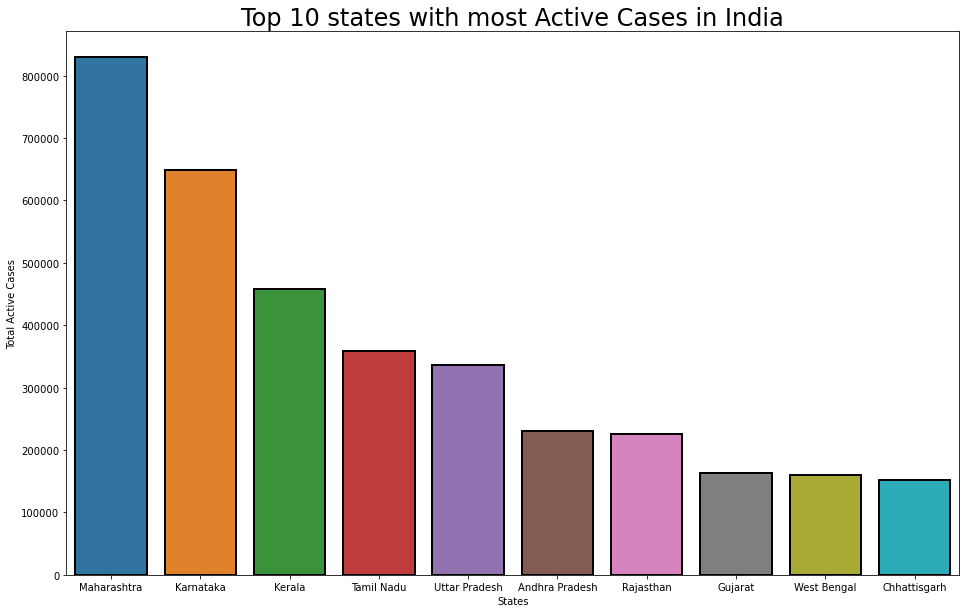

In [160]:
fig=plt.figure(figsize=(16,10))
plt.title("Top 10 states with most Active Cases in India",size=24)
ax=sns.barplot(data=top10Active.iloc[:10],y='Active',x='State/UnionTerritory',linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

## top states with highest number of deaths

In [161]:
top10Deaths=covid.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()

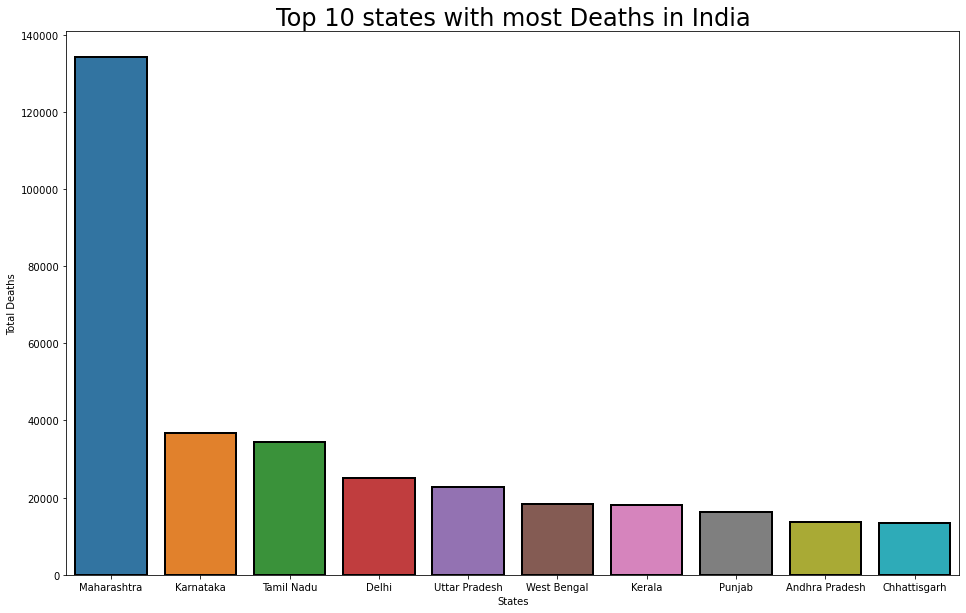

In [162]:
fig=plt.figure(figsize=(16,10))
plt.title("Top 10 states with most Deaths in India",size=24)
ax=sns.barplot(data=top10Deaths.iloc[:10],y='Deaths',x='State/UnionTerritory',linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.show()

In [163]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [164]:
vaccine.shape

(7845, 24)

In [165]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

### checking for missing value

In [166]:
vaccine.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [167]:
vaccine.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [168]:
vaccine.rename(columns={'Total Individuals Vaccinated':"Total"},inplace=True)
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


## Most vaccinated State

In [169]:
max_vacc=vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vacc=max_vacc.sort_values(by='Total',ascending=False)[:5]

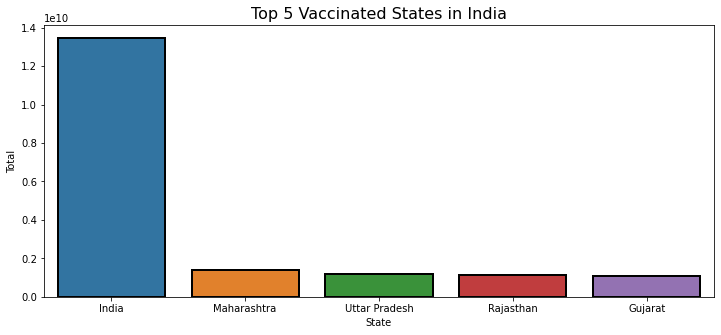

In [170]:
fig=plt.figure(figsize=(12,5))
plt.title("Top 5 Vaccinated States in India",size=16)
x=sns.barplot(data=max_vacc.iloc[:10],y=max_vacc.Total,x=max_vacc.index,linewidth=2,edgecolor='black')

## Least vaccinated State

In [171]:
min_vacc=vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vacc=min_vacc.sort_values(by='Total',ascending=True)[:5]

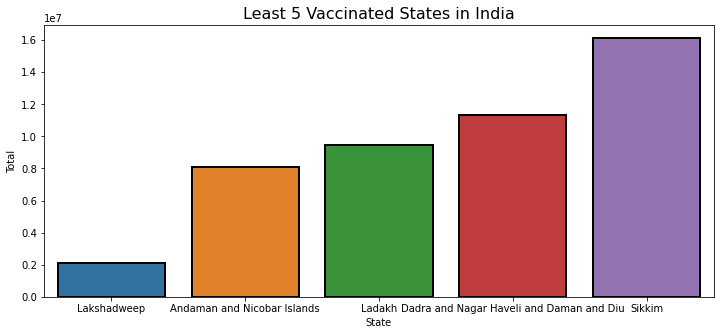

In [172]:
fig=plt.figure(figsize=(12,5))
plt.title("Least 5 Vaccinated States in India",size=16)
x=sns.barplot(data=max_vacc.iloc[:10],y=min_vacc.Total,x=min_vacc.index,linewidth=2,edgecolor='black')